<a href="https://colab.research.google.com/github/tkm22/SEM-Layer-Detection/blob/master/Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example for Layer Detection using yolov4:
Cloning SEM-Layer-Detection from github, then upload images that need to be detected onto the colab

In [1]:
!git clone https://github.com/tkm22/SEM-Layer-Detection

# change makefile to have GPU and OPENCV enabled
%cd SEM-Layer-Detection
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

!make

Cloning into 'SEM-Layer-Detection'...
remote: Enumerating objects: 1365, done.
remote: Counting objects: 100% (1365/1365), done.
remote: Compressing objects: 100% (1068/1068), done.
remote: Total 1365 (delta 300), reused 1334 (delta 282), pack-reused 0
Receiving objects: 100% (1365/1365), 13.58 MiB | 11.54 MiB/s, done.
Resolving deltas: 100% (300/300), done.
/content/SEM-Layer-Detection
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-

In [4]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

/content/SEM-Layer-Detection
CUDA status Error: file: ./src/dark_cuda.c : () : line: 39 : build time: Aug  8 2020 - 04:12:38 

 CUDA Error: no CUDA-capable device is detected
CUDA Error: no CUDA-capable device is detected: Success
darknet: ./src/utils.c:326: error: Assertion `0' failed.


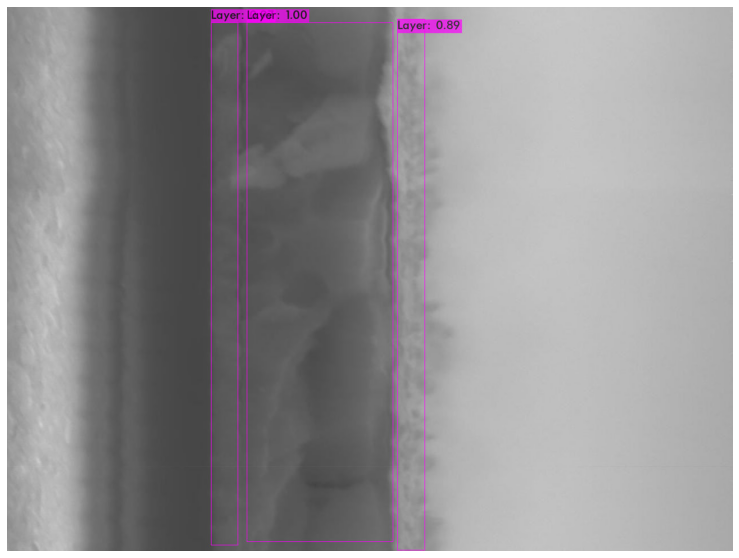

In [5]:
%cd /content/SEM-Layer-Detection/

!./darknet detector test data/obj.data cfg/yolov4-custom.cfg model/yolov4-custom_best.weights data/test/CS-MA-FA.jpg
imShow('predictions.jpg')

In [6]:
download('predictions.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>